<div style="background-color:rgba(100, 160, 200, 0.33);">

<h1>Assignment 3 - Mobile Tracking</h1>

<p>
    <b>Abstract</b>: Monitor and analyze the mobility of nearby mobile device users, using Wi-Fi probe requests.
</p>

</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3> Introduction and outline </h3>
<p>
    We collected our data in various places: Chicago airport, Chicago downtown, Warsaw airport, (TODO). Since we covered two very different countries, we want to know if there are some differences in the data we collected. First, we will look at the device vendors' frequency. Then, we want to see how many new MAC address appear during the period.
<p>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3> Device vendor frequency </h3>
<p>
    The data is from the probe requests collected at Chicago airport and Warsaw airport.
    # TODO: add probe response.
<p>

In [40]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

lst = []
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

def get_unique_list(file):
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst.append(row[2])
        return Counter(lst)
    
def create_histogram(list, ven):
    for v in ven:
        for lst in list:
            if lst.startswith(v[0]):
                v[1] += 1
    return ven

lst_c = get_unique_list('airport_chicago/probe_req.csv')
hist_c = create_histogram(lst_c, vendor)
print(hist_c)

[['Apple', 69], ['Google', 71], ['Samsung', 42], ['LGE', 11], ['HTC', 5], ['Huawei', 2], ['Xiaomi', 2], ['HMD', 1], ['Nest', 3]]


<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Visualization </h2>

<h3> Chicago Airport Data </h3>

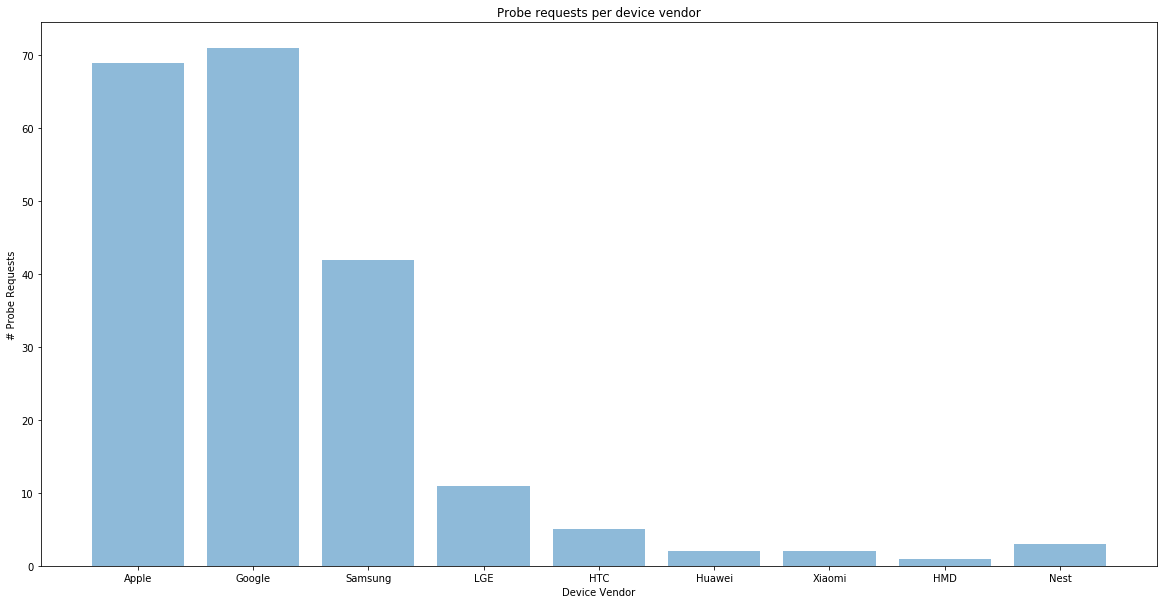

In [41]:
def plot_histogram(lst):
    plt.figure(1,figsize=(20,10)) 
    
    y_pos = np.arange(len(lst))
    accesses = [x[1] for x in lst]
    
    plt.bar(y_pos, accesses, align='center', alpha=0.5) 
    plt.xticks(range(len(lst)), [x[0] for x in lst], size='medium')
 
    plt.xlabel('Device Vendor')
    plt.ylabel('# Probe Requests')
    plt.title('Probe requests per device vendor')
    plt.show()
    
plot_histogram(hist_c)

<h3> Warsaw Airport Data </h3>

In [42]:
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

lst_w = get_unique_list('airport_warsaw/probe_req.csv')
hist_w = create_histogram(lst_w, vendor)
print(hist_w)

[['Apple', 130], ['Google', 95], ['Samsung', 58], ['LGE', 11], ['HTC', 5], ['Huawei', 7], ['Xiaomi', 7], ['HMD', 1], ['Nest', 3]]


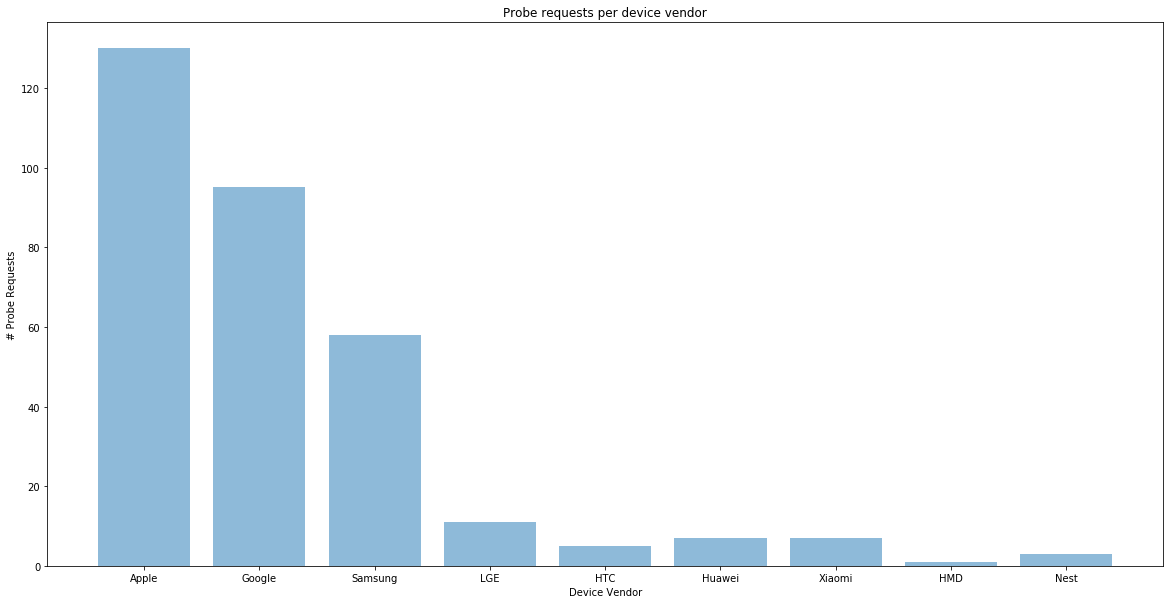

In [43]:
plot_histogram(hist_w)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3> Chicago Downtown Dataset </h3>

In [44]:
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

lst_cd = get_unique_list('downtown_chicago/probe_req.csv')
hist_cd = create_histogram(lst_cd, vendor)
print(hist_cd)

[['Apple', 215], ['Google', 688], ['Samsung', 82], ['LGE', 33], ['HTC', 5], ['Huawei', 7], ['Xiaomi', 7], ['HMD', 1], ['Nest', 7]]


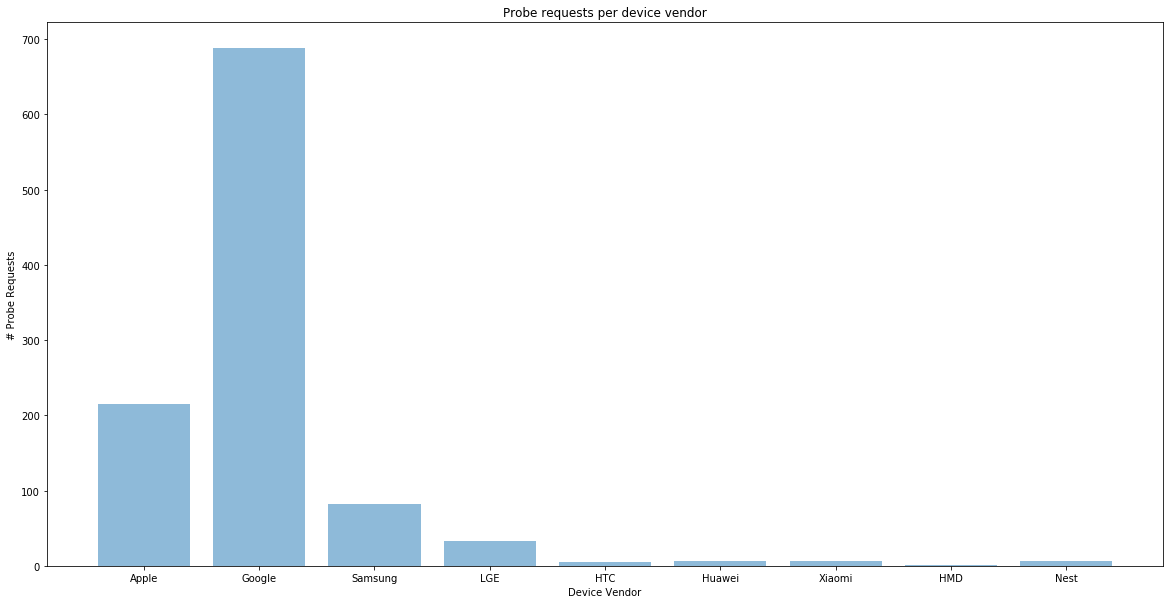

In [45]:
plot_histogram(hist_cd)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Analysis </h2>

The device vendor distribution is similar in both the captures as infered from the plots. Apple is the single most popular device vendor followed by Google and its Android counterparts. But it somehow doesn't make much sense since we know that the popularity of Google's Pixel/Nexus phone is not comparable to Apple. So we refer to some other resources to check where do these MAC address come from. For example, da:a1:19:f5:55:27 is marked as Google in the Wireshark and it also shows up in Wireshark database. But we could not find it in IEEE OUI list (http://standards-oui.ieee.org/oui.txt). So we guess some Android phones might have some randomize mechanisms that they are marked Google.

<h3> Wildcard or not? </h3>

In [46]:
def get_info_list(file):
    lst_info = []
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst_info.append(row[6])
        return lst_info
    
def isWildcard(list):
    count = 0
    for lst in list:
        if 'Wildcard' in lst: 
            count += 1
    return count    

lst_i_c = get_info_list('airport_chicago/probe_req.csv')
wild_c = isWildcard(lst_i_c)
wildcard_per_c = (wild_c/len(lst_i_c))*100
print("At Chicago airport, " + str(round(wildcard_per_c, 2)) + "% of probe requests are wildcard requests.")

lst_i_w = get_info_list('airport_warsaw/probe_req.csv')
wild_w = isWildcard(lst_i_w)
wildcard_per_w = (wild_w/len(lst_i_w))*100
print("At Warsaw airport, " + str(round(wildcard_per_w, 2)) + "% of probe requests are wildcard requests.")

At Chicago airport, 78.18% of probe requests are wildcard requests.
At Warsaw airport, 81.25% of probe requests are wildcard requests.


<h3> Probe Request Analysis </h3>

In [47]:
import matplotlib.pyplot as plt
import numpy as np

TIME_INDEX = 1
INFO_INDEX = -1
PROBE_INDEX = 6
MAC_INDEX = 2


class Analyser:
    def __init__(self):
        self.x = []
        self.y = []

    def readCSV(self, filename):
        file = open(filename, 'r')
        return  file.readlines()

    def show(self):
        plt.plot(self.x[1:-1:10], self.y[1:-1:10])
        plt.xlabel('Time (seconds)')
        plt.ylabel('# devices connected')
        plt.title('Probe requests analysis')
        plt.show()
        plt.show()

    def processData(self):
        pass

class ProbeAnalysis(Analyser):
    def __init__(self, filename):
        super().__init__()
        self.filename = filename
        self.mac = []
        self.wantedList = ["Raspberr_3f:48:74", "Raspberr_76:f1:56", "AVMAudio_42:d6:ff", "Sagemcom_9b:c2:74"]

    def isWildcard(self, inp):
        if len(inp) >= 2 and inp[1] == "Wildcard (Broadcast)":
            return True
        return False
    def processData(self):
        result = {}
        document = self.readCSV(self.filename)
        size = int(float(document[-1].split(",")[1][1:-1]))
        self.x = np.array(range(0, size + 1))
        for i in range(size):
            result[i] = []
        #print(self.x)
        for line in document:
            line = line.split(',')
            wildcard = line[INFO_INDEX][:-2].split("=")

            if line[PROBE_INDEX][1:] == "Probe Request" and self.isWildcard(wildcard) and line[MAC_INDEX][1:-1] not in self.wantedList :

                key = int(float(line[TIME_INDEX][1:-1]))
                if key not in result.keys():
                    result[key] = []
                result[key] = result[key] + [line[MAC_INDEX][1:-1]]

                if line[MAC_INDEX][1:-1] not in self.mac:
                    self.mac.append(line[MAC_INDEX][1:-1]) #add mac_addr list

        return result

    def constructProbeAnalysis(self, result):
        self.y = [len(result[x]) for x in result.keys()]
        #print(self.y)
        #print(len(self.y))
        #print(sum(self.y))
        self.x = self.x[1:-1:10]
        self.y = self.y[1:-1:10]

    def constructMacAnalysis(self, result):
        temp = []
        mac = []
        for i in result.keys():
            count = 0
            for j in result[i]:
                if j not in mac:
                    mac.append(j)
                    count = count + 1
            temp.append(count)
        self.y = temp
        self.y = self.y[1:-1:10]

    def getMacNum(self):
        return self.mac

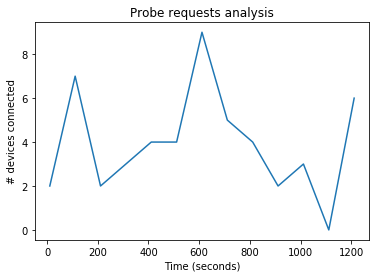

# Devices connected at a given time


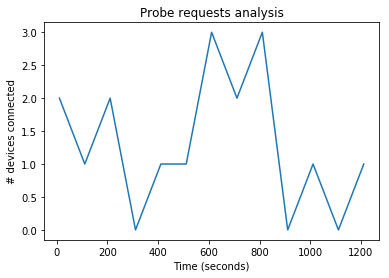

# Newly connected devices at a given time


In [48]:
#Chicago Airport Data

app = ProbeAnalysis("airport_chicago/probe_req.csv")
result = app.processData()
app.constructProbeAnalysis(result)
app.show()
print("# Devices connected at a given time")

app.constructMacAnalysis(result)
app.show()
print("# Newly connected devices at a given time")

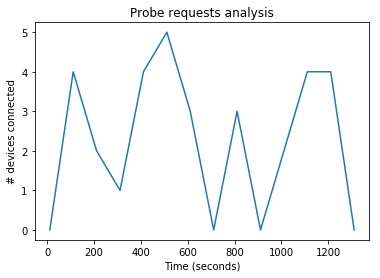

# Devices connected at a given time


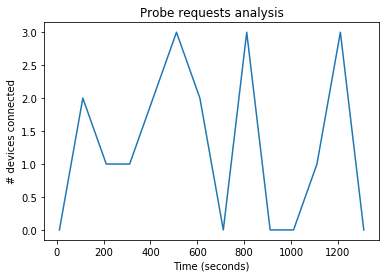

# Newly connected devices at a given time


In [49]:
#Warsaw Airport Data
app = ProbeAnalysis("airport_warsaw/probe_req.csv")
result = app.processData()
app.constructProbeAnalysis(result)
app.show()
print("# Devices connected at a given time")

app.constructMacAnalysis(result)
app.show()
print("# Newly connected devices at a given time")

<h3> Airport Probe Response </h3>

In [50]:
ap_lst = []
vendor = [['Apple', 0], 
          ['Google', 0],
          ['Samsung', 0],
          ['Cisco', 0],
          ['Ruckus', 0],
          ['ARRIS', 0],
          ['Shenzhen', 0],
          ['Huawei', 0],
          ['LGE', 0]]

def get_unique_list(file):
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst.append(row[2])
        return Counter(lst)
        
def create_histogram(list, ven):
    for v in ven:
        for lst in list:
            if lst.startswith(v[0]):
                v[1] += 1
    return ven

lst_ap = get_unique_list('airport_chicago/probe_res.csv')
hist_ap = create_histogram(lst_ap, vendor)
print("List of AP vendors with frequency of Probe Responses")
print(lst_ap)

List of AP vendors with frequency of Probe Responses
Counter({'Cisco_1c:42:e3': 22268, 'Cisco_1c:42:e0': 22223, 'Cisco_91:3f:00': 9966, 'RuckusWi_17:93:08': 9903, 'Cisco_91:3f:04': 9526, 'Cisco_91:3f:01': 9374, 'Cisco_91:3f:03': 8344, 'a2:17:c8:10:14:78': 3272, 'a6:17:c8:10:14:78': 3055, 'aa:17:c8:10:14:78': 2957, 'CiscoMer_10:14:78': 2732, 'ARRISGro_ae:0e:00': 2286, 'ARRISGro_69:39:20': 2121, 'Raspberr_76:f1:56': 1481, 'Cisco_8a:49:f1': 1042, 'Cisco_8a:49:f4': 1024, 'Cisco_8a:49:f0': 983, 'Cisco_8a:49:f3': 971, 'Sonos_d9:43:30': 761, 'Sonos_17:3a:ab': 717, 'e2:55:7d:3a:ae:e3': 354, 'e2:55:7d:3a:ae:e2': 326, 'e2:55:7d:3a:ae:e1': 312, 'Shenzhen_d6:e8:cb': 273, 'Shenzhen_d6:d4:e8': 261, 'e2:55:7d:3a:ae:e0': 256, 'HTC_ec:54:0b': 255, 'MurataMa_19:42:4f': 220, '7e:a1:b4:e7:56:23': 150, 'AMPAKTec_5d:5d:94': 139, 'ARRISGro_55:29:f0': 138, 'Teleepoc_01:bb:03': 135, 'SonyMobi_35:5e:9d': 127, 'd2:40:d0:56:a5:97': 116, 'Apple_69:71:25': 116, 'SamsungE_18:a1:0f': 81, 'Google_f5:55:27': 79, 'Samsu

In [51]:
print("Most active AP list")
print(Counter(lst).most_common(25))

Most active AP list
[('Cisco_1c:42:e3', 22268), ('Cisco_1c:42:e0', 22223), ('Cisco_91:3f:00', 9966), ('RuckusWi_17:93:08', 9903), ('Cisco_91:3f:04', 9526), ('Cisco_91:3f:01', 9374), ('Cisco_91:3f:03', 8344), ('a2:17:c8:10:14:78', 3272), ('a6:17:c8:10:14:78', 3055), ('aa:17:c8:10:14:78', 2957), ('CiscoMer_10:14:78', 2732), ('ARRISGro_ae:0e:00', 2286), ('ARRISGro_69:39:20', 2121), ('Raspberr_76:f1:56', 1481), ('Cisco_8a:49:f1', 1042), ('Cisco_8a:49:f4', 1024), ('Cisco_8a:49:f0', 983), ('Cisco_8a:49:f3', 971), ('Sonos_d9:43:30', 761), ('Sonos_17:3a:ab', 717), ('e2:55:7d:3a:ae:e3', 354), ('e2:55:7d:3a:ae:e2', 326), ('e2:55:7d:3a:ae:e1', 312), ('Shenzhen_d6:e8:cb', 273), ('Shenzhen_d6:d4:e8', 261)]


In [52]:
print("Unique AP vendor list")
print(hist_ap)

Unique AP vendor list
[['Apple', 215], ['Google', 688], ['Samsung', 82], ['Cisco', 11], ['Ruckus', 7], ['ARRIS', 10], ['Shenzhen', 8], ['Huawei', 7], ['LGE', 33]]


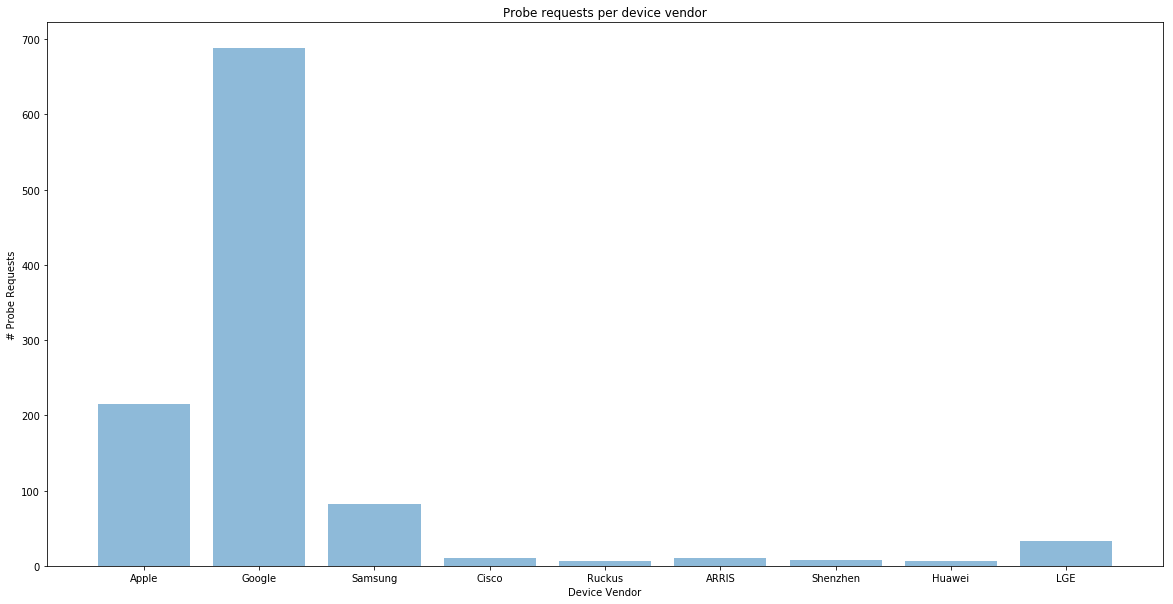

In [53]:
plot_histogram(hist_ap)

<h3> Analysis </h3>

<p>  A few APs with a large amount of probes. A large set of mobile hotspots with a small number of probe responses. <p>